# Problema de los valores y vectores propios

Existen [múltiples sistemas en física](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Applications) que [ocurren naturalmente](https://hubpages.com/education/What-the-Heck-are-Eigenvalues-and-Eigenvectors) como un problema de valores/vectores propios. En esta lección veremos como resolver un problema de este tipo utilizando Python.

## Formulación matemática

Sea una matriz cuadrada $A \in \mathbb{R}^{D\times D}$. El siguiente sistema de ecuaciones de $D$ ecuaciones

$$
A \vec v = \lambda I \vec v 
$$

que se puede escribir de forma equivalente como

$$
(A - \lambda I) \vec v = 0
$$

tiene como resultado 

- $\lambda$, los valores propios de $A$
- $\vec v$ los vectores propios de $A$

La solución no trivial de este problema ($\vec v \neq 0$) se obtiene si $(A - \lambda I)$ es singular, es decir

$$
|A - \lambda I | = 0
$$

que resulta en un polinomio de grado $D$ cuyas raices son $\{\lambda_i\}$, $i=1,2,\ldots, D$

Una vez determinado $\lambda_i$ se pueden usar para despejar $\vec v_i$

**Ejemplo**

Para la matriz $A$ del ejemplo, si igualamos su determinante a cero tenemos

$$
(1 - \lambda)^2 - 1/4 = 3/4 - 2\lambda + \lambda^2 = 0
$$

osea $\lambda_1 = 1.5$ y $\lambda_2 = 0.5$. Luego para el primer vector propio tenemos un sistema de ecuaciones

$$
\begin{split}
-0.5v_{11} +0.5v_{12} &= 0 \\
0.5 v_{11} -0.5v_{12} &= 0
\end{split}
$$

osea $v_{11} = v_{12}$ con esto podemos construir un vector normalizado genérico $v_1 = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}$

De forma equivalente para $v_2 = \frac{1}{\sqrt{2}}\begin{pmatrix} -1 \\ 1 \end{pmatrix}$

## Cálculo de valores y vectores propios con scipy

El módulo [`linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) de scipy ofrece funciones para obtener vectores y valores propios. Los de aplicación más común son:

- `eig(X)`: Retorna una tupla con los valores y vectores propios de `X`
- `eigvals(X)`: Retorna los valores propios de `X`
- `eigh(X)`: Retorna una tupla con los valores y vectores propios de `X`, asumiendo que `X` tiene simetría hermítica
- `eigvalsh(X)`: Retorna los valores propios de `X`, asumiendo que `X` tiene simetría hermítica

Utilicemos `eig` para el ejemplo anterior: 

In [1]:
import numpy as np
import scipy.linalg

A = np.array([[1., 0.5], [0.5, 1]])
evals, evecs = scipy.linalg.eig(A)
evals, evecs

(array([1.5+0.j, 0.5+0.j]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## Descomposicion en valores propios

Una aplicación importante del problema de valores/vectores propios es la **descomposición en vectores propios**

**Principal Component Analysis (PCA):** Es un procedimiento estadístico que busca una **transformación ortogonal** para los datos que logre **maximizar su varianza**

Un conjunto de datos $\{x_i\}$ con $i=1,2,\ldots, M$ y $x_i \in \mathbb{R}^D$

Podemos escribirlo como una matriz $X \in \mathbb{R}^{M\times D}$

Asumiendo que los datos **tienen media cero**, podemos calcular su matriz de correlación como 
$$
C = \frac{1}{M} X^T X
$$

donde $C \in \mathbb{R}^{D\times D}$ y $\bar X$ es la media del conjunto

Llamemos $W \in \mathbb{R}^{D\times D}$ a la matriz de proyección y $X' = X W$ los datos proyectados

- Varianza de $X'$: $\frac{1}{M} X'^T X' = \frac{1}{M} W^T X^T X W = W^T C W$
- Ortogonalidad: $W^T W = I$

Luego el problema de PCA se puede escribir como

$$
\max_W W^T C W \text{ sujeto a } W^T W = I
$$

Si usamos *multiplicadores de Lagrange* para incluir la restricción. Luego derivamos e igualamos a cero

$$
\begin{align}
\frac{d}{dW} W^T C W + \Lambda(I- W^T W) &= 0 \nonumber \\ 
CW - \Lambda W &= 0 \nonumber
\end{align}
$$

donde $\Lambda = \lambda I$ y $\lambda = (\lambda_1, \lambda_2, \ldots, \lambda_D)$

:::{important}

La transformación de PCA consiste en encontrar los valores y vectores propios de $C$

:::

**Ejemplo**

Sean los siguientes datos bidimensionales

In [2]:
np.random.seed(12345)
X = np.random.multivariate_normal([0, 0], [[0.5, -0.7], [-0.7, 1]], size=1000)

Usaremos PCA para encontrar los ejes coordenados de máxima varianza y graficarlos 

In [3]:
# Se resta la media
X_ = X - np.mean(X, axis=0, keepdims=True)
# Se calcula la covarianza
C = np.dot(X_.T, X_)/len(X_)
# Se calculan los valores y vectores propios de la covarianza
L, W = scipy.linalg.eigh(C)
# Se proyectan los datos
U = np.dot(X, W)

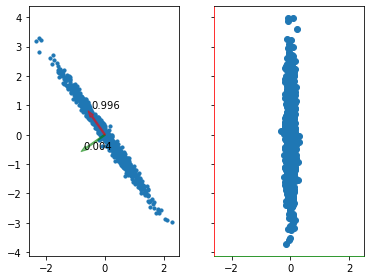

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

arrow_args = {'width': 0.05, 'length_includes_head': True, 'alpha': 0.5}
fig, ax = plt.subplots(1, 2, figsize=(6, 4), tight_layout=True, sharex=True, sharey=True)

ax[0].scatter(X[:, 0], X[:, 1], s=10);
ax[0].set_aspect('equal'); 
ax[1].set_aspect('equal'); 

for i, c in enumerate(['g', 'r']):
    ax[0].arrow(0, 0, W[i, 0], W[i, 1], color=c, **arrow_args)
    ax[0].text(W[i, 0]+0.1, W[i, 1]+0.1, "%0.3f" %(L[i]/np.sum(L)))
    
ax[1].scatter(U[:, 0], U[:, 1])
ax[1].spines['bottom'].set_color('g')
ax[1].spines['left'].set_color('r')

**Resultado:** 

- El eje rojo acumula un 99.6% de la varianza
- El eje verde es ortogonal al rojo
- Los nuevos ejes están decorrelacionados con respecto a los originales


:::{note}

PCA suele utilizarse como descartar variables poco informativas en un paso previo al entrenamiento de modelos de predicción. Profundizaremos en esto más adelante

:::